**Цель работы**

Реализовать градиентный спуск для нахождения минимума функции.

**Ход работы**

*Импорт библиотек*

In [9]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import random as rnd

from mpl_toolkits.mplot3d.axes3d import get_test_data


*Функция, у которой мы ищем минимум:*

37. $f(x, y) = \dfrac{1}{|x|+ 4} + \dfrac{3}{y2+ 4}$

In [10]:
def f(x, y):
    return 1/(abs(x) + 4) + 3/(y**2+4)

*Визуализация*

Text(0.5, 0, 'z')

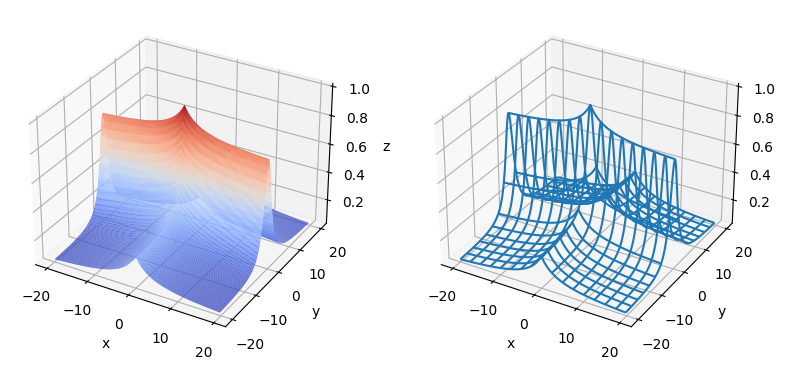

In [11]:
fig = plt.figure(figsize=plt.figaspect(0.5), dpi=100)

ax = fig.add_subplot(1, 2, 1, projection='3d')
X = np.arange(-20, 20, 0.25)
Y = np.arange(-20, 20, 0.25)
X, Y = np.meshgrid(X, Y)
Z = f(X,Y)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax = fig.add_subplot(1, 2, 2, projection='3d')

ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

Text(0, 0.5, 'z')

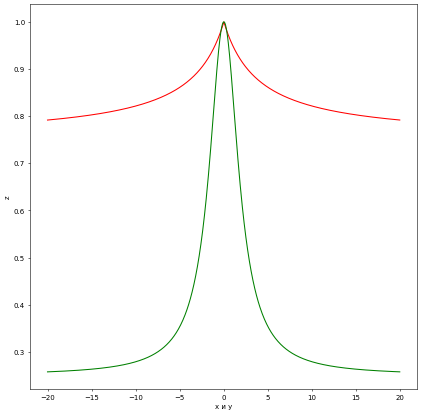

In [12]:
X3 = np.arange(-20, 20, 0.05)
Y3 = np.arange(-20, 20, 0.05)
Z3 = f(X3, Y3)
ff, ax = plt.subplots(figsize=(10,10), dpi=50)
ax.plot(X3,f(X3, 0),'r')

ax.plot(Y3,f(0, Y3),'g')
ax.set_xlabel('x и y')
ax.set_ylabel('z')

*Формула градиента для нашей функции*

$\nabla f = \left(\dfrac{\partial f}{\partial x}, \dfrac{\partial f}{\partial y}\right) = grad\ f$

$f(x_1,x_2,...,x_n) $

$\nabla f = \left(\dfrac{\partial f}{\partial x_1}, \dfrac{\partial f}{\partial x_2},...,\dfrac{\partial f}{\partial x_n}\right) = grad\ f$

$\nabla f = (-\dfrac{1}{(|x|+4)^2}\cdot \dfrac{x}{|x|} $, где $x \neq 0, -\dfrac{6 \cdot y}{(y^2 +4)^2})$

*Алгоритим* ***Adam***

Запрашиваемые параметры (Настраиваются до шага):

$\alpha$ - размер шага (Скорость обучения)

$\beta_1, \beta_2 \in [0, 1)$ - коэффициент затухания ЕМА (Експотенциальное скользящее среднее)

$f(\theta) $ - наша функция

$ m_0 \leftarrow $ Инициализируем 1 момент вектора (среднего)

$ v_0 \leftarrow $ Инициализируем 2 момент вектора (нецентрированная дисперсия)

$t \leftarrow $ Номер шага градиента (время)

Пока $\theta_t$ не сошлось делаем:

  $ t \leftarrow t + 1 $

  $g_t \leftarrow \nabla f(\theta_t-1) $ получаем градиент на шаге t

  $m_t \leftarrow \beta_1 \cdot m_{t-1} + (1 - \beta_1) \cdot g_t$ обновляем основу первого момента импулься

  $v_t \leftarrow \beta_2 \cdot v_{t-1} + (1 - \beta_2)\cdot g_t^2$ обновляем основу второго момента импульса

  $\hat{m} \leftarrow \dfrac{m_t}{1 - \beta_1^t}$ вычисляем корректировку первого момента импульса

  $\hat{v} \leftarrow \dfrac{v_t}{1 - \beta_2^t}$
  вычисляем корректировку второго момента импульса

  $\theta_t \leftarrow \theta_{t-1} - \alpha \cdot \dfrac{\hat{m}_{t-1}}{\sqrt{\hat{v_t}} + \epsilon}$

Возвращаем $\theta_t$




Рекомендованные параметры

α — шаг обучения (скорость обучения).

β1 — параметр для шага момента приближения шага (также первый момент в  Adam). Обычно 0.9

β2 — параметр для шага RMSProp (также второй момент для  Adam). Обычно 0.99

ϵ — Обработка деления на ноль. Обычно $10^{-8}$

m , v — Первый и второй момент . Инициализируем по-началу нулями.

t — шаг градиента для функции θ.

*Расчёт производных по x и y с помощью библиотеки sympy*

In [13]:
from sympy import *

x = Symbol('x')
y = Symbol('y')
z = 1/(abs(x) + 4) + 3/(y**2+4)

yprime = z.diff(y)
zprime = z.diff(x)
print(yprime)

-6*y/(y**2 + 4)**2


*Если х будет равным нулю, то будем менять значения производной*

In [14]:
def df_x(x):
    return -1/(abs(x)+4)**2*x/abs(x) if x !=0 else rnd.choice([0.1, -0.1])

def df_y(y):
    return -6*y/(y**2 + 4)**2 if y!=0  else rnd.choice([0.1, -0.1])

def f_grad(x, y):
    return (df_x(x), df_y(y))

f_grad(0, 0) # проверка значений градиента от нулевых значений

(0.1, -0.1)

Количество шагов:  1
min_grad f(19.9360597695832, 20.1521910391744): 0.0490930667892188
min_func: 0.04909240924092409
x: -20 -20 0.04909240924092409


Text(0.5, 0, 'z')

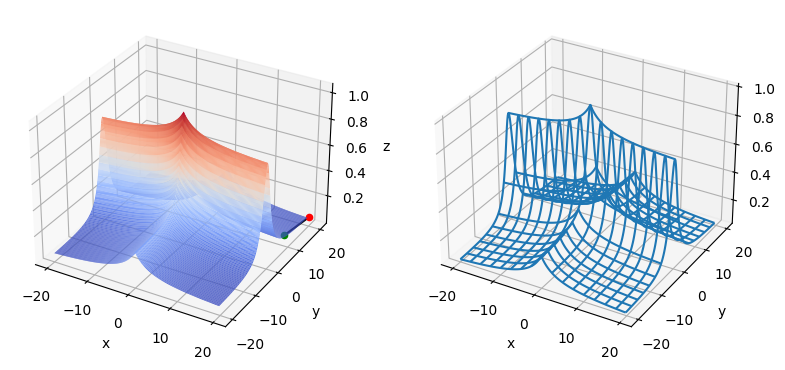

In [20]:
fig = plt.figure(figsize=plt.figaspect(0.5), dpi=100)

ax = fig.add_subplot(1, 2, 1, projection='3d')
X = np.arange(-20, 20, 0.25)
Y = np.arange(-20, 20, 0.25)
X, Y = np.meshgrid(X, Y)
Z = f(X,Y)

# Стартовая точка
x_0 = 20*np.random.random()
y_0 = 20*np.random.random()
ax.scatter(x_0, y_0, f(x_0, y_0), color='green')

alpha = 1
m_x, m_y, v_x, v_y = (0, 0, 0, 0)
beta1, beta2 = (0.9, 0.9)
eps = 0.001
for t in np.arange(1, 150):
    z_0 = f(x_0,y_0)
    x_grad, y_grad = f_grad(x_0,y_0)

    m_x, m_y = list(map(lambda grad, m: (1-beta1)*grad+beta1*m ,(x_grad, y_grad), (m_x, m_y)))
    m_corrected_x, m_corrected_y = list(map(lambda m: m / (1-np.power(beta1, t)),(m_x, m_y)))

    v_x, v_y = list(map(lambda grad, v: (1-beta2)*grad**2+beta2*v,(x_grad, y_grad), (v_x, v_y)))
    v_corrected_x, v_corrected_y = list(map(lambda v: v/ (1-np.power(beta2, t)),(v_x, v_y)))

    x_1 = x_0 - alpha*m_corrected_x / (sqrt(v_corrected_x) + eps)
    y_1 = x_0 - alpha*m_corrected_y / (sqrt(v_corrected_y) + eps)

    z_1 = f(x_1,y_1)
    ax.plot([x_0, x_1], [y_0, y_1], [z_0, z_1], color='black',zorder=1)
    x_0, y_0 = x_1, y_1
    if (z_0 - z_1) < eps: break
    z_last = z_1 # Копируем рез-т функции для проверки

print('Количество шагов: ', t)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.scatter(x_0, y_0, f(x_1, y_1), color='red')
ax = fig.add_subplot(1, 2, 2, projection='3d')

print(f"min_grad f{x_0, y_0}: {z_1}")
print(f"min_func: {list(map(f, X, Y))[0].min()}")
# print(f"min_func: {f(y_0, y_0)}")
print('x:', -20, -20, f(-20, -20))

ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

**Вывод**

В ходе лабораторной работы реализовали градиентный спуск для нахождения минимума функции.